# 1. Import

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Plotting setting**

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Load data

In [4]:
customerdata = pd.read_csv('EcommerceCustomers.csv')
customerdata.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Display basic info**

In [5]:
print (customerdata.shape)
customerdata.info()
customerdata.describe()

(500, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Check missing values**

In [6]:
customerdata.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [8]:
customerdata.columns = customerdata.columns.str.replace(' ', '_').str.lower()
print(customerdata.columns)

Index(['email', 'address', 'avatar', 'avg._session_length', 'time_on_app',
       'time_on_website', 'length_of_membership', 'yearly_amount_spent'],
      dtype='object')


# 3. Exploratory Data Analysis

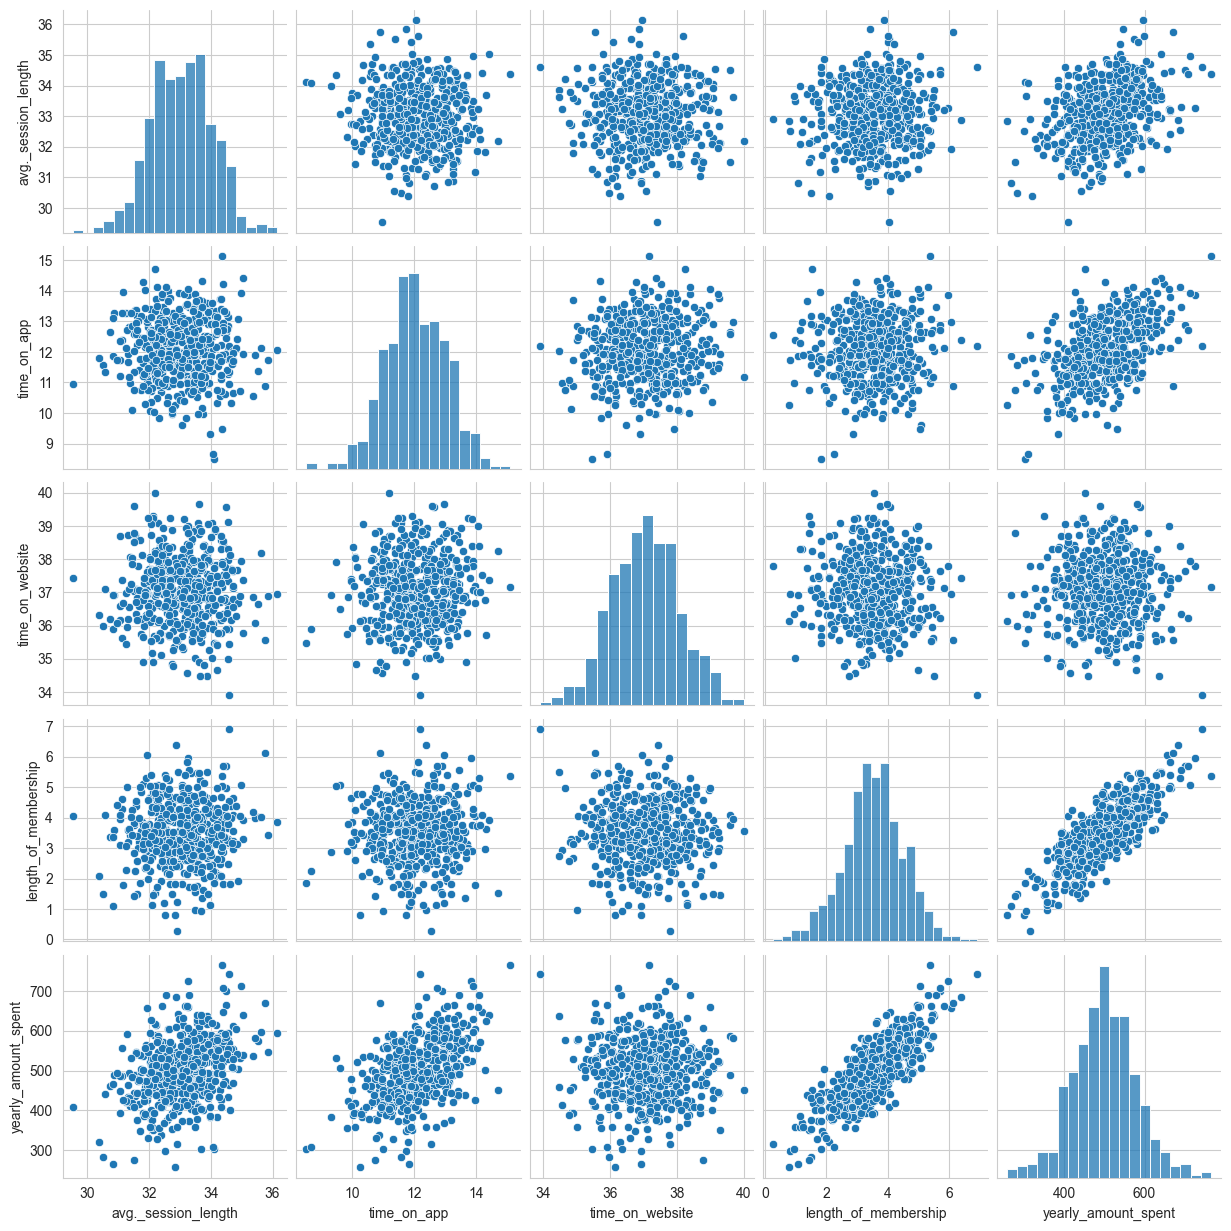

In [10]:
sns.pairplot(customerdata)
plt.show()

**Correlation matrix**

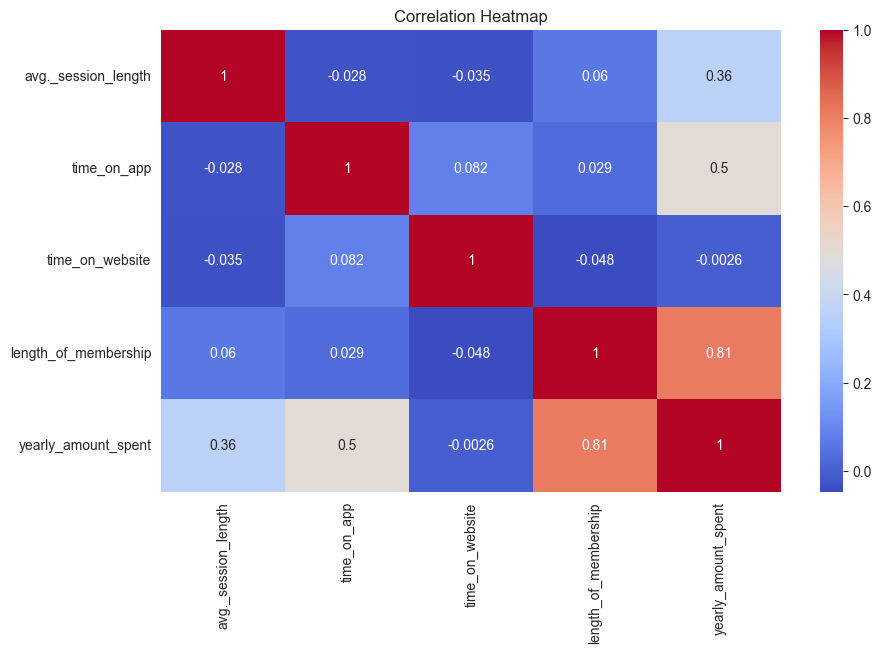

In [ ]:
corr = customerdata.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

- length_of_membership has a very strong positive linear relationship with yearly_amount_spent => Customers who have been members longer tend to spend more per year.

- There is a noticeable positive trend between time_on_app and yearly_amount_spent, suggesting a potential correlation. => customers who engage more with the mobile app may spend more.

- time_on_website and yearly_amount_spent: No clear trend or correlation is observed from the scatterplot => time on the website is less impactful on yearly spending

- avg_session_length: appears to have weak or no clear relationship with spending => Likely a less important predictor.

focus on analyzing each of the following key relationships:

Time on App vs Yearly amount spent

Time on Website vs Yearly amount spent

Length of membership vs Yearly amount spent

Text(0.5, 1.05, 'Time on App vs Yearly Amount Spent')

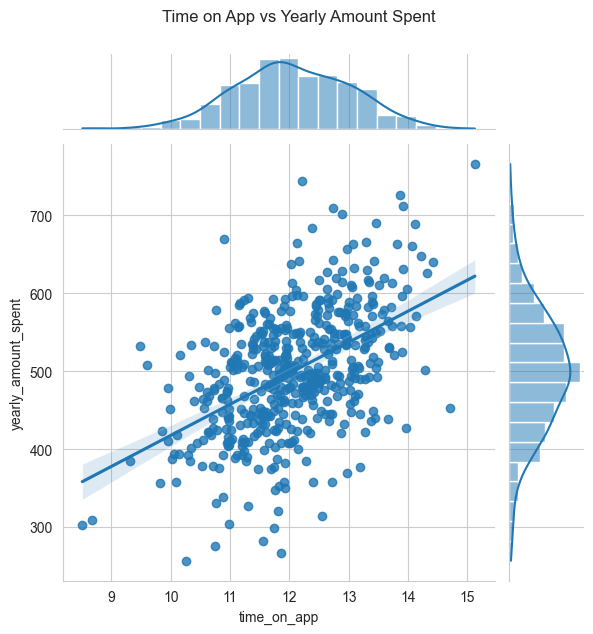

In [12]:
sns.jointplot(data=customerdata, x='time_on_app', y='yearly_amount_spent', kind='reg')
plt.suptitle("Time on App vs Yearly Amount Spent", y=1.05)

Plot shows positive linear relationship between time spent on the mobile app and yearly customer spending.
As time_on_app increases, yearly_amount_spent tends to increase as well

Text(0.5, 1.05, 'Time on Website vs Yearly Amount Spent')

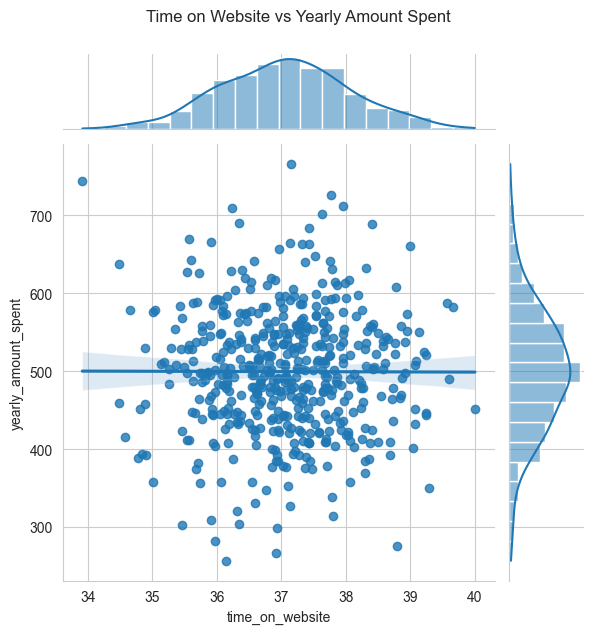

In [14]:
sns.jointplot(data=customerdata, x='time_on_website', y='yearly_amount_spent', kind='reg')
plt.suptitle("Time on Website vs Yearly Amount Spent", y=1.05)


no clear correlation between time_on_website vs yearly_amount_spent
Time spent on the website doesn't appear to affect customer spending

Text(0.5, 1.05, 'Length of Membership vs Yearly Amount Spent')

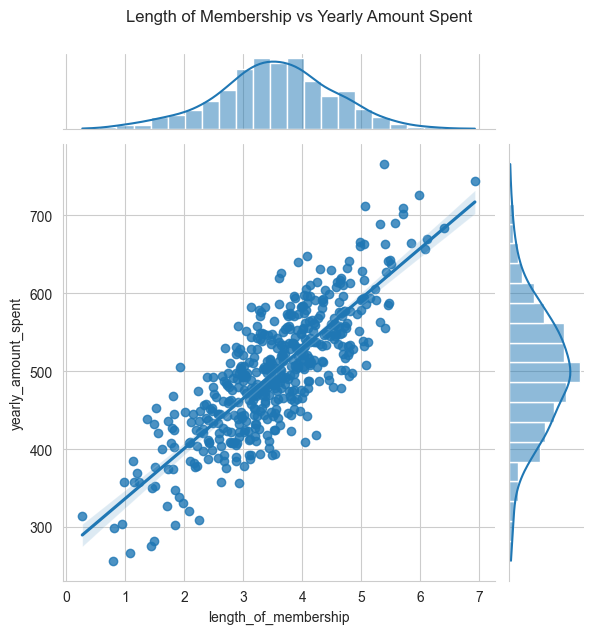

In [15]:
sns.jointplot(data=customerdata, x='length_of_membership', y='yearly_amount_spent', kind='reg')
plt.suptitle("Length of Membership vs Yearly Amount Spent", y=1.05)


This shows the strongest positive linear relationship => Customers who have been members longer tend to spend significantly more per year.
Suggests high value in customer retention and loyalty strategies.

# 4. Modeling - Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Train-test split**

In [27]:
customerdata.columns

Index(['email', 'address', 'avatar', 'avg._session_length', 'time_on_app',
       'time_on_website', 'length_of_membership', 'yearly_amount_spent'],
      dtype='object')

In [42]:
x = customerdata[[ 'avg._session_length','time_on_app', 'time_on_website', 'length_of_membership']]
y = customerdata['yearly_amount_spent']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=101)

**Training Model**

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

**Evaluate coefficients**

In [44]:
coefficients = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
print(coefficients)

                      Coefficient
avg._session_length     25.981550
time_on_app             38.590159
time_on_website          0.190405
length_of_membership    61.279097


**Make predictions & evaluate**

In [45]:
y_pred = lm.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 7.228148653430824
MSE: 79.8130516509745
RMSE: 8.933815066978637
R² Score: 0.9890046246741234


**Visualization**

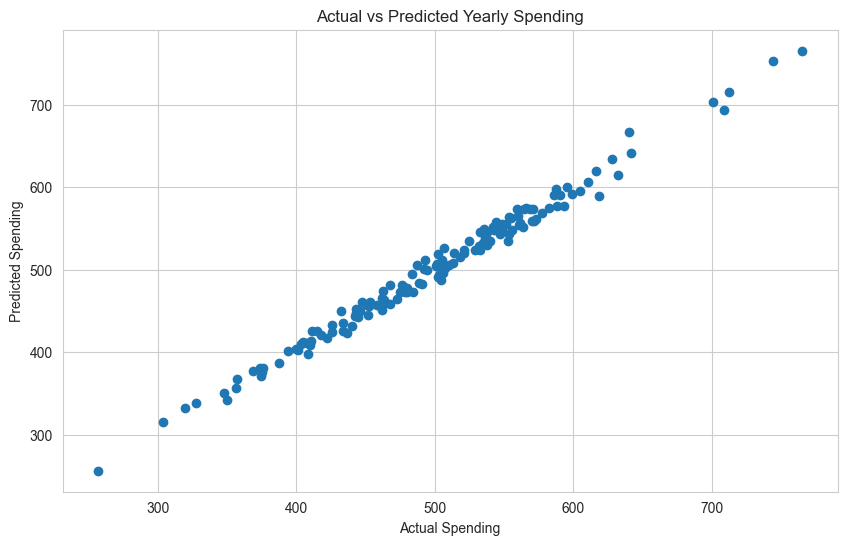

In [38]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Spending")
plt.ylabel("Predicted Spending")
plt.title("Actual vs Predicted Yearly Spending")
plt.show()

**Residuals analysis**

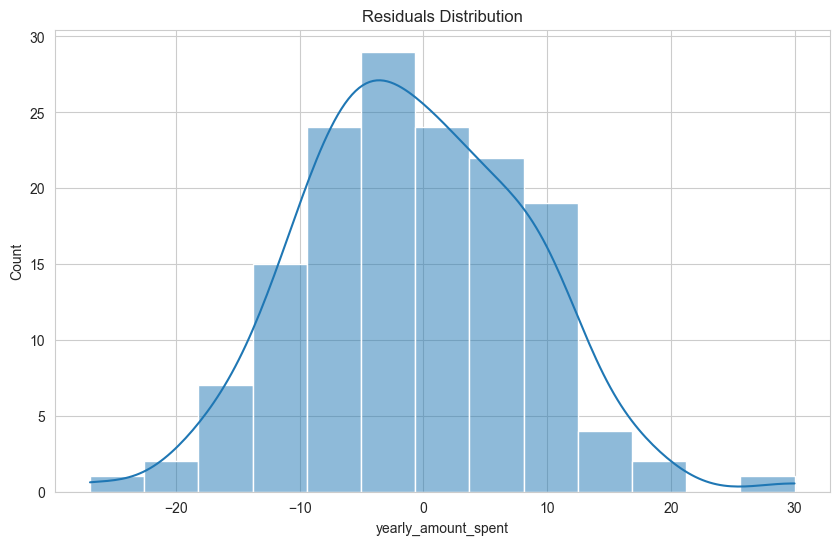

In [39]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

The residuals appear to follow a normal distribution and are centered around 0, indicating that the errors are randomly distributed.
This suggests that the linear regression model fits the data well, supports the assumption of linearity, and adds credibility to the model’s predictions.

# 5. Conclusion

Model summary: 

The Linear Regression model achieved an R² score of ~0.989 and a low RMSE of ~8.93.

The residuals followed an approximately normal distribution, indicating the model is statistically reliable and fits the data well.


Let's see which feature have the highest impact on customer spending: time_on_app, time_on_website or length_of_membership by re-interpret the coefficients of all variables:

In [46]:
coefficients = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
print(coefficients)

                      Coefficient
avg._session_length     25.981550
time_on_app             38.590159
time_on_website          0.190405
length_of_membership    61.279097


Base on above result, length_of_membership have the highest coefficient. The second-highest is time_on_app, indicate that app usage also has a strong positive correlation with yearly spending. Add-ins, time spent on the mobile app has a much stronger impact on yearly spending than time spent on the website.

Therefore, beside focusing on customer retention and loyalty strategies, the company should also prioritize improving the mobile app experience, focusing on usability (Invest in mobile app UX/UI,...), personalization,  and mobile engagement strategies to drive higher customer spending.